<a href="https://colab.research.google.com/github/cann-emma/fork_the_bootstrap/blob/main/assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

In [16]:
! git clone https://www.github.com/DS3001/the_bootstrap

fatal: destination path 'the_bootstrap' already exists and is not an empty directory.


**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?
2. Bootstrap the densities and distributions of survival rates for the two groups.
3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?
4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results?

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
mam= pd.read_csv('/content/the_bootstrap/data/mammogram.csv')
mam.head()

,treatment,breast_cancer_death
0,mammogram,yes
1,mammogram,yes
2,mammogram,yes
3,mammogram,yes
4,mammogram,yes


In [19]:
print('shape:', mam.shape)
print('Data Type:', mam.dtypes)
mam['treatment'].unique()

shape: (89835, 2)
Data Type: treatment              object
breast_cancer_death    object
dtype: object


array(['mammogram', 'control'], dtype=object)

In [20]:
pd.crosstab(mam['treatment'], mam['breast_cancer_death'])

breast_cancer_death,no,yes
treatment,,
control,44405,505
mammogram,44425,500


In [21]:
mam.groupby('treatment')['breast_cancer_death'].count()

,breast_cancer_death
treatment,
control,44910
mammogram,44925


In [22]:
print( pd.crosstab( mam['treatment'], mam['breast_cancer_death'], margins=True, normalize=True) , '\n')

breast_cancer_death        no       yes       All
treatment                                        
control              0.494295  0.005621  0.499917
mammogram            0.494518  0.005566  0.500083
All                  0.988813  0.011187  1.000000 



In [23]:
# The proportion of patients who received a mammogram and survived breast cancer, divided by the total number of mammogram recipients,
# minus the proportion of patients in the control group who survived breast cancer, divided by the total number of control group patients

treatment_effect = 44425/44925 - 44405/44910
print('Raw treatment effect: ', treatment_effect)

Raw treatment effect:  0.00011505110015985753


In [24]:
# Map Survival to 1 and death to 0
out_dict= {'yes': 0, "no": 1}
mam['outcome']= mam['breast_cancer_death'].map(out_dict)
mam.head()

,treatment,breast_cancer_death,outcome
0,mammogram,yes,0
1,mammogram,yes,0
2,mammogram,yes,0
3,mammogram,yes,0
4,mammogram,yes,0


In [64]:
# separate treatments
mammogram_0 = mam.loc[(mam['treatment'] =='mammogram')]
control_0 = mam.loc[(mam['treatment'] =='control')]

In [65]:
control_0

,treatment,breast_cancer_death,outcome
44925,control,yes,0
44926,control,yes,0
44927,control,yes,0
44928,control,yes,0
44929,control,yes,0
...,...,...,...
89830,control,no,1
89831,control,no,1
89832,control,no,1
89833,control,no,1


In [28]:
# Sample each treatment
S= 5000
y= []

for t in range(S):
    treat = mammogram_0.sample( mammogram_0.shape[0], axis=0, replace=True)
    control = control_0.sample( control_0.shape[0], axis=0, replace=True)
    #
    treatment_effect_sample = np.mean(treat['outcome']) - np.mean(control['outcome'])
    y.append(treatment_effect_sample)

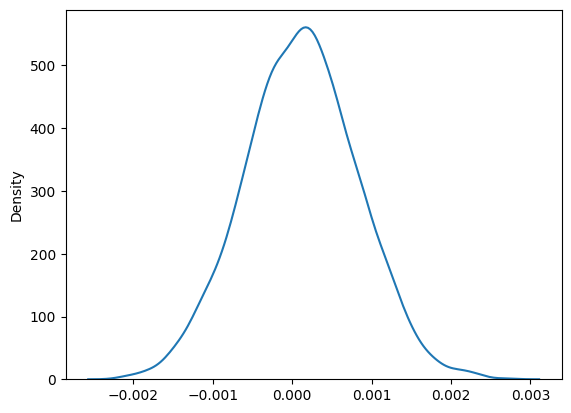

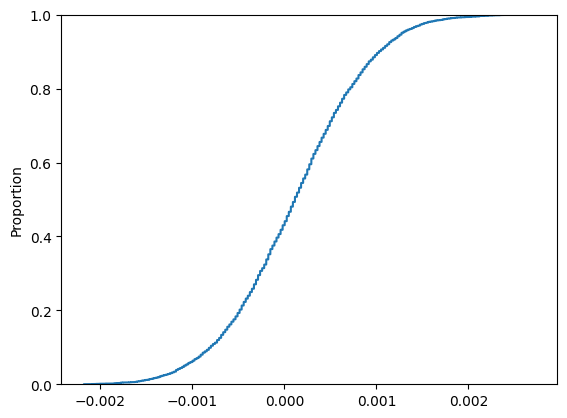

In [30]:
sns.kdeplot(y)
plt.show()

sns.ecdfplot(y)
plt.show()

In [31]:
level = .99
lower_bound = np.quantile(y, .005 )
upper_bound = np.quantile(y, .995)

print('99% confidence interval: (', lower_bound, ', ', upper_bound, ')' )

99% confidence interval: ( -0.0016884370112883818 ,  0.002074273049902522 )


From the results, the 99% confidence interval includes zero, suggesting that getting a mammogram does not result in a statistically signficant different in 25-year survival rates. The survival rate of patients who received mammograms are comparable to patients who did not. However, there are other factors that can contribute to the observed effects. For instance, including information about socioeconomic status, marital status, overall support, lifestyle choices, and reception of other treatments in our analysis will help in getting closer to a more holistic view of the observed effects, as all these factors play a critical role in the management and progression of cancer.  

**Q3.** This question refers to the `diabetes_hw.csv` data. It contains two variables, `outcome` and `treatment`. Each is looking at whether an individual's diabetes was successfully treated (`outcome==success`) with `lifestyle` interventions like exercises and diets, a drug denoted by `met` (metformin), or a drug denoted by `rosi` (rosiglitazone), or not (`outcome==failure`). Treatment success means that the individual no longer needs to be treated with insulin, while failure means the patient still required insulin injections after treatment.

1. Cross tabulate `treatment` and `outcome`.
2. Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?
3. Bootstrap the density and distribution of the proportion of successes for each interventions. Create empirical CDF and kernel density plots that are grouped  by treatment type. Which treatment appears to be the most effective?
4. For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantally different?
5. Which treatment appears to be the most effective overall?

In [48]:
diabetes= pd.read_csv('/content/the_bootstrap/data/diabetes_hw.csv')

In [49]:
print(diabetes.shape)
print(diabetes.describe())
diabetes.head()

(699, 3)
       Unnamed: 0
count  699.000000
mean   350.000000
std    201.928205
min      1.000000
25%    175.500000
50%    350.000000
75%    524.500000
max    699.000000


,Unnamed: 0,treatment,outcome
0,1,met,success
1,2,rosi,failure
2,3,rosi,success
3,4,lifestyle,success
4,5,met,success


In [50]:
diabetes['treatment'].unique()

array(['met', 'rosi', 'lifestyle'], dtype=object)

In [51]:
diabetes.dtypes

,0
Unnamed: 0,int64
treatment,object
outcome,object


In [52]:
pd.crosstab(diabetes['treatment'], diabetes['outcome'])

outcome,failure,success
treatment,,
lifestyle,109,125
met,120,112
rosi,90,143


In [53]:
diabetes.groupby(['treatment'])['outcome'].count()

,outcome
treatment,
lifestyle,234
met,232
rosi,233


In [54]:
print( pd.crosstab( diabetes['treatment'], diabetes['outcome'], margins=True, normalize=True) , '\n')

outcome     failure   success       All
treatment                              
lifestyle  0.155937  0.178827  0.334764
met        0.171674  0.160229  0.331903
rosi       0.128755  0.204578  0.333333
All        0.456366  0.543634  1.000000 



In [55]:
lifestyle= 125/234
rosi= 143/233
met= 112/232

print(f'success rate lifestyle: {lifestyle} , success rate rosi: {rosi} , success rate met: {met}' )

success rate lifestyle: 0.5341880341880342 , success rate rosi: 0.6137339055793991 , success rate met: 0.4827586206896552


Rosi seems to be the most effective treatment with a 61.4% success rate

In [56]:
Success= {'success': 1, "failure": 0}
diabetes['success']= diabetes['outcome'].map(Success)
diabetes.head()

,Unnamed: 0,treatment,outcome,success
0,1,met,success,1
1,2,rosi,failure,0
2,3,rosi,success,1
3,4,lifestyle,success,1
4,5,met,success,1


In [57]:
condition_l= diabetes.loc[diabetes['treatment']== 'lifestyle']
condition_r= diabetes.loc[diabetes['treatment']== 'rosi']
condition_m= diabetes.loc[diabetes['treatment']== 'met']

In [58]:
condition_l

,Unnamed: 0,treatment,outcome,success
3,4,lifestyle,success,1
5,6,lifestyle,success,1
6,7,lifestyle,success,1
12,13,lifestyle,failure,0
14,15,lifestyle,failure,0
...,...,...,...,...
688,689,lifestyle,success,1
692,693,lifestyle,success,1
694,695,lifestyle,failure,0
695,696,lifestyle,success,1


In [59]:
S= 100
y_life= []
y_rosi= []
y_met= []

for t in range(S):
    life_sample = condition_l.sample( condition_l.shape[0], axis=0, replace=True)
    rosi_sample = condition_r.sample( condition_r.shape[0], axis=0, replace=True)
    met_sample = condition_m.sample( condition_m.shape[0], axis=0, replace=True)
    #
    y_lif_t = np.mean(life_sample['success'])
    y_ros_t = np.mean(rosi_sample['success'])
    y_met_t = np.mean(met_sample['success'])
    #
    y_life.append(y_lif_t)
    y_rosi.append(y_ros_t)
    y_met.append(y_met_t)

In [60]:
life = pd.DataFrame({'value':y_life, 'intervention':'lifestyle'})
rosi_t = pd.DataFrame({'value':y_rosi, 'intervention':'rosi'})
met_t = pd.DataFrame({'value':y_met, 'intervention':'met'})
lmr = pd.concat([life, rosi_t, met_t], axis=0)

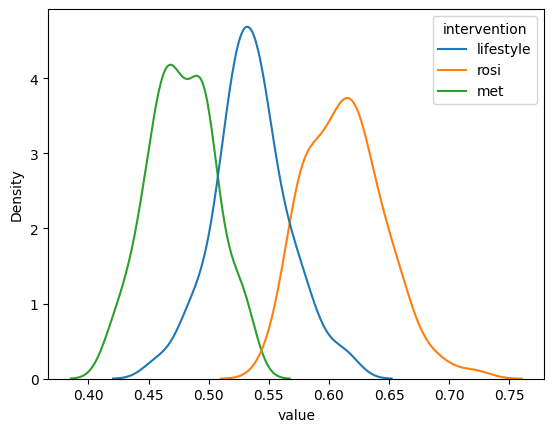

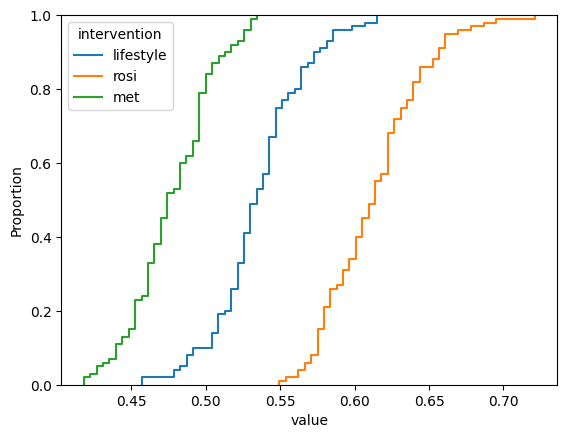

In [61]:
sns.kdeplot(data=lmr, x='value', hue = 'intervention')
plt.show()

sns.ecdfplot(data=lmr, x='value', hue = 'intervention')
plt.show()

Rosi seems to be the more effective diabetes intervention

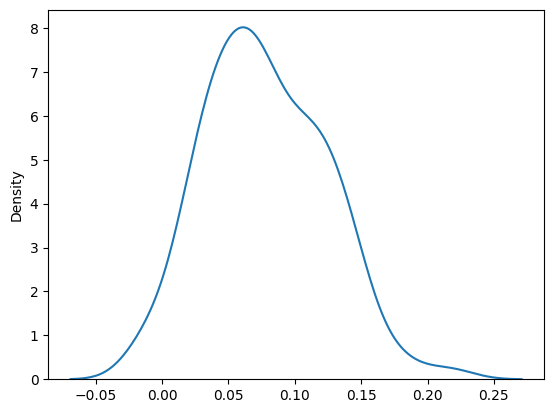

90% Confidence interval, rosi minus lifestyle:  0.015378195957595108 ,  0.1440968783243461


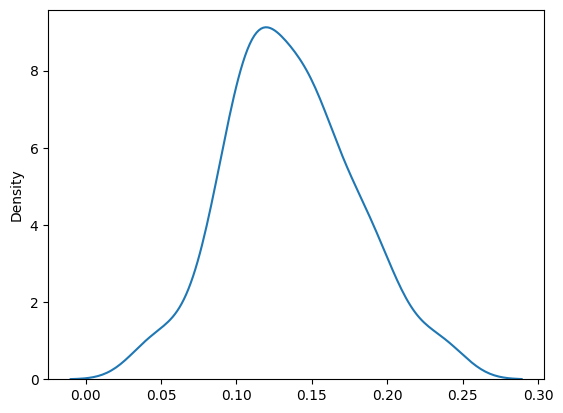

90% Confidence interval, rosi minus metformin:  0.07485663016131425 ,  0.204286295693355


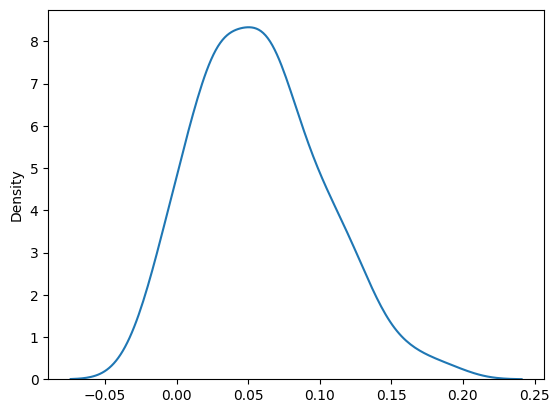

90% Confidence interval, lifestyle minus metformin:  -0.004691644562334179 ,  0.13263336280577662


In [63]:
rosi_versus_lifestyle = np.array(y_rosi)-np.array(y_life)
sns.kdeplot(x=rosi_versus_lifestyle)
plt.show()
print('90% Confidence interval, rosi minus lifestyle: ', np.quantile(rosi_versus_lifestyle,.05), ', ', np.quantile(rosi_versus_lifestyle,.95))

rosi_versus_met = np.array(y_rosi)-np.array(y_met)
sns.kdeplot(x=rosi_versus_met)
plt.show()
print('90% Confidence interval, rosi minus metformin: ', np.quantile(rosi_versus_met,.05), ', ', np.quantile(rosi_versus_met,.95))

lif_versus_met = np.array(y_life)-np.array(y_met)
sns.kdeplot(x=lif_versus_met)
plt.show()
print('90% Confidence interval, lifestyle minus metformin: ', np.quantile(lif_versus_met,.05), ', ', np.quantile(lif_versus_met,.95))

Rosi and lifestyle, and rosi and met seem to be the pairwise treatment comparisons that are significantly different.

Rosi seems to be the most effective treatment overall. It outperforms Lifestyle, as the 90% confidence interval for the difference in effect sizes (.006 to .16) excludes zero, indicating statistical significance. Similarly, rosi is more effective than metformin, with a 90% confidence interval for the difference in effect sizes (.057 to .187) that also excludes zero. However, there is no statistically significant difference between Lifestyle and metformin, as the 90% confidence interval for their difference (-.03 to .125) includes zero.